In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('uberdrive.csv')

In [60]:
fitness_df = pd.read_csv('CardioGoodFitness.csv')

In [61]:
housing_df = pd.read_csv('Melbourne_housing_FULL.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [62]:
fitness_df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66


In [64]:
housing_df.head(4)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.718,144.878,Western Metropolitan,3464.0,Detached Garage,8.400e+05
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.846,144.956,Southern Metropolitan,3280.0,Attached Garage,1.275e+06
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.845,144.954,Southern Metropolitan,3280.0,Indoor,1.455e+06


In [6]:
# Get the number of rows of dataframe.
len(df)                             

1156

In [7]:
#View the last 3 rows of data
df.tail(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [8]:
# understand shape and size of data 
print(df.shape)
print(df.size)

(1156, 7)
8092


In [9]:
# check info about data (includes column names, the number of non-null values in it, and data-type for each column.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [10]:
# Get the datatype for each column of dataframe.
df.dtypes 

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [11]:
# get numerical overview of numerical type columns (MILES)
df.describe()         

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [12]:
# Same as above, gives non-null number of records
df.count()

START_DATE    1156
END_DATE      1155
CATEGORY      1155
START         1155
STOP          1155
MILES         1156
PURPOSE        653
dtype: int64

In [13]:
pd.crosstab(df['START'],df['CATEGORY'])

CATEGORY,Business,Personal
START,,
Agnew,4,0
Almond,1,0
Apex,17,0
Arabi,1,0
Arlington,1,0
...,...,...
West University,2,0
Weston,1,1
Westpark Place,15,2


In [14]:
# Is any of the values in the df null?  (# Useful in writing validation scripts on large number of files )
df.isnull().any()

START_DATE    False
END_DATE       True
CATEGORY       True
START          True
STOP           True
MILES         False
PURPOSE        True
dtype: bool

In [15]:
# You can also find the columns with missing values through the snippet below
null_cols = df.columns[df.isnull().any()] # get only the columns that have a null value.
null_cols = list(null_cols)
print(null_cols)
# Get the columns into a list and do use it to do some operations

['END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE']


In [16]:
# isnull() function checks the number of null values and sum() function sums up the count of these.
# Shows the column wise values of missing data
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [17]:
df[df['PURPOSE'].isnull()].head(10)
# you can as well do a head() function on this to just view the first n rows

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,2/9/2016 10:54,2/9/2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,2/9/2016 11:43,2/9/2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,2/9/2016 13:36,2/9/2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
88,2/9/2016 13:58,2/9/2016 14:02,Personal,Preston,Whitebridge,1.5,NaN
89,2/9/2016 18:55,2/9/2016 19:11,Business,Cary,Morrisville,6.1,NaN
102,2/13/2016 23:45,2/14/2016 0:01,Personal,East Elmhurst,Jackson Heights,2.7,NaN
103,2/14/2016 0:50,2/14/2016 1:00,Personal,Jackson Heights,East Elmhurst,1.8,NaN
109,2/16/2016 8:29,2/16/2016 9:34,Business,Unknown Location,Colombo,14.1,NaN


In [18]:
df['PURPOSE'].count()

653

In [19]:
pd.crosstab(fitness_df['Product'],fitness_df['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [20]:
pd.pivot_table(fitness_df, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [21]:
df[df['END_DATE'].isnull()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [22]:
# the above record has no entry apart from the miles and can be discarded
df.drop(1155, inplace = True)  
# we set the inplace attribute to True so that the row is dropped and the dataframe is updated simultaneously.

In [23]:
# Rename the columns to remove the * from the names
# Why ? we can use df.START_DATE same way as  df['START_DATE*']
col_names = ['START_DATE','END_DATE','CAT', 'START' , 'STOP' , 'MILES','PURPOSE']
df.columns = col_names

In [24]:
# You can also rename the specific column names 
df.rename( columns = {'CAT':'CATEGORY'})
df.head()

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [25]:
# shows the top 5 entries where PURPOSE is null
df[df.PURPOSE.isnull()].head(5)

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,2/9/2016 10:54,2/9/2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,2/9/2016 11:43,2/9/2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,2/9/2016 13:36,2/9/2016 13:52,Personal,Tanglewood,Preston,5.1,NaN


In [26]:
# Here we have the rows that have atleast one null value. Note that since only PURPOSE column has the null value,
# We will get all the records where purpose is null
df[df.isnull().any(axis = 1)].head(5)

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,2/9/2016 10:54,2/9/2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,2/9/2016 11:43,2/9/2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,2/9/2016 13:36,2/9/2016 13:52,Personal,Tanglewood,Preston,5.1,NaN


In [27]:
# inverting the selection ( not null ) ( works for booleans cases)
# using the ~, we invert the selection done in the above methods. 
# Here only the records where the purpose is not null will show up.
df[~df.PURPOSE.isnull()]

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [28]:
#1. Conditions within dataframe 
df[df['MILES'] > 30].head()

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
36,1/20/2016 13:25,1/20/2016 14:19,Business,Raleigh,Cary,40.2,Customer Visit
108,2/16/2016 3:21,2/16/2016 4:13,Business,Katunayaka,Unknown Location,43.7,Customer Visit
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
233,3/17/2016 15:16,3/17/2016 15:58,Business,Katy,Houston,30.2,Meeting


In [29]:
#2. SQL-like query
df.query('MILES > 60').head(5)

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
268,3/25/2016 13:24,3/25/2016 16:22,Business,Cary,Latta,144.0,Customer Visit
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit
270,3/25/2016 22:54,3/26/2016 1:39,Business,Jacksonville,Kissimmee,201.0,Meeting


In [30]:
df.MILES.max()

310.3

In [31]:
# Show the row that has the max miles 
df[df.MILES == df.MILES.max()]                              

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit


In [32]:
# Show the top 10 rides (in terms of distance driven)
print(df.MILES.sort_values(ascending=False).head(10))

269    310.3
270    201.0
881    195.9
776    195.6
546    195.3
559    180.2
297    174.2
299    159.3
727    156.9
298    144.0
Name: MILES, dtype: float64


In [33]:
# Shows the top 10 rows of MILES (decreasing value)               
df.sort_values(by='MILES' , ascending=False).head(10)

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit
270,3/25/2016 22:54,3/26/2016 1:39,Business,Jacksonville,Kissimmee,201.0,Meeting
881,10/30/2016 15:22,10/30/2016 18:23,Business,Asheville,Mebane,195.9,NaN
776,9/27/2016 21:01,9/28/2016 2:37,Business,Unknown Location,Unknown Location,195.6,NaN
546,7/14/2016 16:39,7/14/2016 20:05,Business,Morrisville,Banner Elk,195.3,NaN
559,7/17/2016 12:20,7/17/2016 15:25,Personal,Boone,Cary,180.2,Commute
297,4/2/2016 19:38,4/2/2016 22:36,Business,Jacksonville,Ridgeland,174.2,Customer Visit
299,4/3/2016 2:00,4/3/2016 4:16,Business,Florence,Cary,159.3,Meeting
727,8/27/2016 16:15,8/27/2016 19:13,Business,Unknown Location,Unknown Location,156.9,NaN
268,3/25/2016 13:24,3/25/2016 16:22,Business,Cary,Latta,144.0,Customer Visit


In [34]:
# set precision to 3 for decimal values
pd.set_option('display.precision',3)

In [35]:
# Get the initial data with dropping the NA values
df_dropped = df.dropna()

In [36]:
# Get the unique starting point, unique destination
# names of unique start points
print(df['START'].unique())

['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Whitebridge' 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Tanglewood' 'Preston' 'Eastgate'
 'East Elmhurst' 'Jackson Heights' 'Long Island City' 'Katunayaka'
 'Unknown Location' 'Colombo' 'Nugegoda' 'Islamabad' 'R?walpindi'
 'Noorpur Shahan' 'Heritage Pines' 'Westpark Place' 'Waverly Place'
 'Wayne Ridge' 'Weston' 'East Austin' 'West University' 'South Congress'
 'The Drag' 'Congress Ave District' 'Red River District' 'Georgian Acres'
 'North Austin' 'Coxville' 'Convention Center District' 'Austin' 'Katy'
 'Sharpstown' 'Sugar Land' 'Galveston' 'Port Bolivar' 'Washington Avenue'
 'Briar Meadow' 'Latta' 'Jacksonville'

In [37]:
# Count of unique start points using  len()
len(df['START'].unique())                              

177

In [38]:
# or use can use the nunique function
df['START'].nunique()

177

In [39]:
# Get the names of stopping destinations, unique destinations
# Names of unique stopping points
df['STOP'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary',
       'Morrisville', 'New York', 'Queens', 'East Harlem', 'NoMad',
       'Midtown', 'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Queens County', 'Gulfton', 'Downtown',
       'Houston', 'Jamestown Court', 'Durham', 'Whitebridge',
       'Lake Wellingborough', 'Raleigh', 'Umstead', 'Hazelwood',
       'Westpark Place', 'Meredith Townes', 'Leesville Hollow', 'Apex',
       'Chapel Hill', 'Williamsburg Manor', 'Macgregor Downs',
       'Edgehill Farms', 'Northwoods', 'Tanglewood', 'Preston',
       'Walnut Terrace', 'Jackson Heights', 'East Elmhurst',
       'Midtown West', 'Long Island City', 'Jamaica', 'Unknown Location',
       'Colombo', 'Nugegoda', 'Katunayaka', 'Islamabad', 'R?walpindi',
       'Noorpur Shahan', 'Heritage Pines', 'Waverly Place', 'Wayne Ridge',
       'Depot Historic District', 'Weston', 'West University',
       'South Congress', 'Arts District', 'Congress Ave District

In [40]:
#Identify popular start points - top 10
df['START'].value_counts().head(10)

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START, dtype: int64

In [41]:
# Are there cases where the start and the stop location are the same  ? 
df[df['START'] == df['STOP']]

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting


In [42]:
df.groupby('START')['MILES'].sum().sort_values(ascending = False ).head(10)

START
Unknown Location    1976.5
Cary                1791.3
Morrisville          671.7
Raleigh              433.0
Islamabad            401.2
Durham               384.4
Jacksonville         375.2
Latta                310.3
Asheville            287.7
Whitebridge          273.4
Name: MILES, dtype: float64

### Combining data frame

In [43]:
df7 = pd.DataFrame({"customer":['101','102','103','104'], 
                    'category': ['cat2','cat2','cat1','cat3'],
                    'important': ['yes','no','yes','yes'],
                    'sales': [125,52,214,663]},index=[0,1,2,3])

df8 = pd.DataFrame({"customer":['101','103','104','105'], 
                    'color': ['yellow','green','green','blue'],
                    'distance': [12,9,44,21],
                    'sales': [123,214,663,331]},index=[4,5,6,7])
print('df7')
print(df7)
print('df8')
print(df8)

df7
  customer category important  sales
0      101     cat2       yes    125
1      102     cat2        no     52
2      103     cat1       yes    214
3      104     cat3       yes    663
df8
  customer   color  distance  sales
4      101  yellow        12    123
5      103   green         9    214
6      104   green        44    663
7      105    blue        21    331


In [44]:
pd.concat([df7,df8],axis=0,sort=False)

,customer,category,important,sales,color,distance
0,101,cat2,yes,125,NaN,NaN
1,102,cat2,no,52,NaN,NaN
2,103,cat1,yes,214,NaN,NaN
3,104,cat3,yes,663,NaN,NaN
4,101,NaN,NaN,123,yellow,12.0
5,103,NaN,NaN,214,green,9.0
6,104,NaN,NaN,663,green,44.0
7,105,NaN,NaN,331,blue,21.0


In [45]:
# Merge combines dataframes using a column's values to identify common entries
# outer merge is union of on
pd.merge(df7,df8,how='outer',on='customer') 

,customer,category,important,sales_x,color,distance,sales_y
0,101,cat2,yes,125.0,yellow,12.0,123.0
1,102,cat2,no,52.0,NaN,NaN,NaN
2,103,cat1,yes,214.0,green,9.0,214.0
3,104,cat3,yes,663.0,green,44.0,663.0
4,105,NaN,NaN,NaN,blue,21.0,331.0


In [46]:
# inner merge is intersection of on
pd.merge(df7,df8,how='inner',on='customer') 

,customer,category,important,sales_x,color,distance,sales_y
0,101,cat2,yes,125,yellow,12,123
1,103,cat1,yes,214,green,9,214
2,104,cat3,yes,663,green,44,663


In [47]:
# left merge is just first on, but all columns ... right is second
pd.merge(df7,df8,how='right',on='customer') 

,customer,category,important,sales_x,color,distance,sales_y
0,101,cat2,yes,125.0,yellow,12,123
1,103,cat1,yes,214.0,green,9,214
2,104,cat3,yes,663.0,green,44,663
3,105,NaN,NaN,NaN,blue,21,331


In [48]:
pd.merge(df7,df8,how='left',on='customer')

,customer,category,important,sales_x,color,distance,sales_y
0,101,cat2,yes,125,yellow,12.0,123.0
1,102,cat2,no,52,NaN,NaN,NaN
2,103,cat1,yes,214,green,9.0,214.0
3,104,cat3,yes,663,green,44.0,663.0


In [49]:
new_df = df8[(df8['customer']!='105') & (df8['color']!='green')]
new_df

,customer,color,distance,sales
4,101,yellow,12,123


In [50]:
def profit(s):
    return s*0.5 # 50% markup...

In [51]:
df8['sales'].apply(profit)

4     61.5
5    107.0
6    331.5
7    165.5
Name: sales, dtype: float64

## Statistics

In [52]:
fitness_df['Age'].std()

6.943498135399795

In [53]:
fitness_df['Age'].mean()

28.788888888888888

In [54]:
fitness_df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000,0.280,0.015,0.061,0.513,0.037
Education,0.280,1.000,0.395,0.411,0.626,0.307
Usage,0.015,0.395,1.000,0.669,0.520,0.759
Fitness,0.061,0.411,0.669,1.000,0.535,0.786
Income,0.513,0.626,0.520,0.535,1.000,0.543
Miles,0.037,0.307,0.759,0.786,0.543,1.000


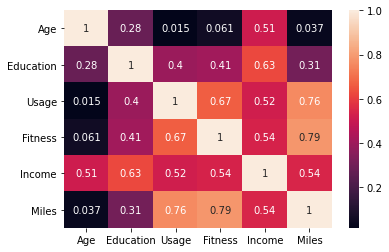

In [81]:
sns.heatmap(fitness_df.corr(), annot=True)

In [83]:
df.mean()

MILES    10.567
dtype: float64

In [85]:
df.mode()

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
0,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,9.9,Meeting


In [86]:
df.median()

MILES    6.0
dtype: float64

In [88]:
df.quantile(q=0.25)  

MILES    2.9
Name: 0.25, dtype: float64

In [89]:
df.quantile(q=0.50)   

MILES    6.0
Name: 0.5, dtype: float64

In [90]:
df.std()

MILES    21.579
dtype: float64

## Encoding of Categorical Data

In [56]:
df.head(3)

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [57]:
 #This function does One-Hot-Encoding on categorical text
df_dummies= pd.get_dummies(df, prefix='CA_', columns=['CAT'])

In [58]:
df_dummies

,START_DATE,END_DATE,START,STOP,MILES,PURPOSE,CA__Business,CA__Personal
0,1/1/2016 21:11,1/1/2016 21:17,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1,0
1,1/2/2016 1:25,1/2/2016 1:37,Fort Pierce,Fort Pierce,5.0,NaN,1,0
2,1/2/2016 20:25,1/2/2016 20:38,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1,0
3,1/5/2016 17:31,1/5/2016 17:45,Fort Pierce,Fort Pierce,4.7,Meeting,1,0
4,1/6/2016 14:42,1/6/2016 15:49,Fort Pierce,West Palm Beach,63.7,Customer Visit,1,0
...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Kar?chi,Kar?chi,0.7,Meeting,1,0
1151,12/31/2016 13:24,12/31/2016 13:42,Kar?chi,Unknown Location,3.9,Temporary Site,1,0
1152,12/31/2016 15:03,12/31/2016 15:38,Unknown Location,Unknown Location,16.2,Meeting,1,0
1153,12/31/2016 21:32,12/31/2016 21:50,Katunayake,Gampaha,6.4,Temporary Site,1,0


In [59]:
# returns the names of all the columns as a list
df_dummies.columns   

Index(['START_DATE', 'END_DATE', 'START', 'STOP', 'MILES', 'PURPOSE',
       'CA__Business', 'CA__Personal'],
      dtype='object')

In [65]:
housing_df

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.718,144.878,Western Metropolitan,3464.0,Detached Garage,8.400e+05
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.846,144.956,Southern Metropolitan,3280.0,Attached Garage,1.275e+06
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.845,144.954,Southern Metropolitan,3280.0,Indoor,1.455e+06
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.782,145.020,Northern Metropolitan,2211.0,Parkade,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,NaN,105,1990.0,Darebin City Council,-37.698,145.023,Northern Metropolitan,21650.0,Parkade,4.750e+05
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,NaN,225,1995.0,Hume City Council,-37.637,144.930,Northern Metropolitan,5833.0,Underground,5.910e+05
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.0,152,1970.0,Greater Dandenong City Council,-37.970,145.154,South-Eastern Metropolitan,4054.0,Carport,NaN
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.0,NaN,NaN,Greater Dandenong City Council,-37.978,145.148,South-Eastern Metropolitan,4054.0,Detached Garage,7.805e+05


In [68]:
from sklearn.preprocessing import LabelEncoder   # import label encoder
labelencoder = LabelEncoder()  
housing_df['RegionId'] = labelencoder.fit_transform(housing_df.Regionname) # returns label encoded variable(s)

In [69]:
housing_df.head(3)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,RegionId
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,inf,NaN,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.0,Carport,NaN,2
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,225,2016.0,Moonee Valley City Council,-37.718,144.878,Western Metropolitan,3464.0,Detached Garage,8.400e+05,6
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,82,1900.0,Port Phillip City Council,-37.846,144.956,Southern Metropolitan,3280.0,Attached Garage,1.275e+06,5


In [70]:
from sklearn.preprocessing import OneHotEncoder
hotencoder = OneHotEncoder()
encoded = hotencoder.fit_transform(housing_df.RegionId.values.reshape(-1,1)).toarray() 
# Returns a numpy array of one hot encoded variables
encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

## Normalization and Scaling

In [71]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [73]:
housing_df['Bedroom_Stdscale'] = std_scale.fit_transform(housing_df[['Bedroom']]) # returns z-scores of the values of the attribute

In [74]:
housing_df['Bedroom_Stdscale'].head()

0   -1.106
1   -0.086
2   -1.106
3   -1.106
4   -0.086
Name: Bedroom_Stdscale, dtype: float64

In [75]:
housing_df['Bedroom_Stdscale'].min(), housing_df['Bedroom_Stdscale'].max()  # min and max value

(-3.145444429584421, 27.445844747462964)

In [76]:
housing_df['Bedroom_Stdscale'].describe()   # 5 point summary statistics of the attribute

count    2.664e+04
mean    -9.577e-18
std      1.000e+00
min     -3.145e+00
25%     -1.106e+00
50%     -8.632e-02
75%      9.334e-01
max      2.745e+01
Name: Bedroom_Stdscale, dtype: float64

In [77]:
# MinMaxScaler normalizes the data using the formula (x - min)/(max - min)
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
minmax_scale

MinMaxScaler()

In [78]:
housing_df['Car_MinMaxScale'] = minmax_scale.fit_transform(housing_df[['Car']])

In [79]:
housing_df['Car_MinMaxScale'].describe()

count    26129.000
mean         0.066
std          0.039
min          0.000
25%          0.038
50%          0.077
75%          0.077
max          1.000
Name: Car_MinMaxScale, dtype: float64